In [123]:
import pickle
import os
import json
from pycocotools import mask
import skimage.io as io
import cv2
import skimage.color as color
import skimage.measure as measure
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 15]


In [98]:
pickle_file_name = "infer_result"
pickle_file = open(pickle_file_name, "rb")


In [99]:
image_path = r"D:\x\Real start -glutamic trans\3g - Full set- May 16"

In [186]:
#seek the image if wanted
pickle_file.seek(0)
while True:
    obj = pickle.load(pickle_file)
    if obj['f'] == '1526500770344.png':
        break
#[pickle.load(pickle_file) for i in range(13230)];


In [187]:
file_name



'1526500692261.png'

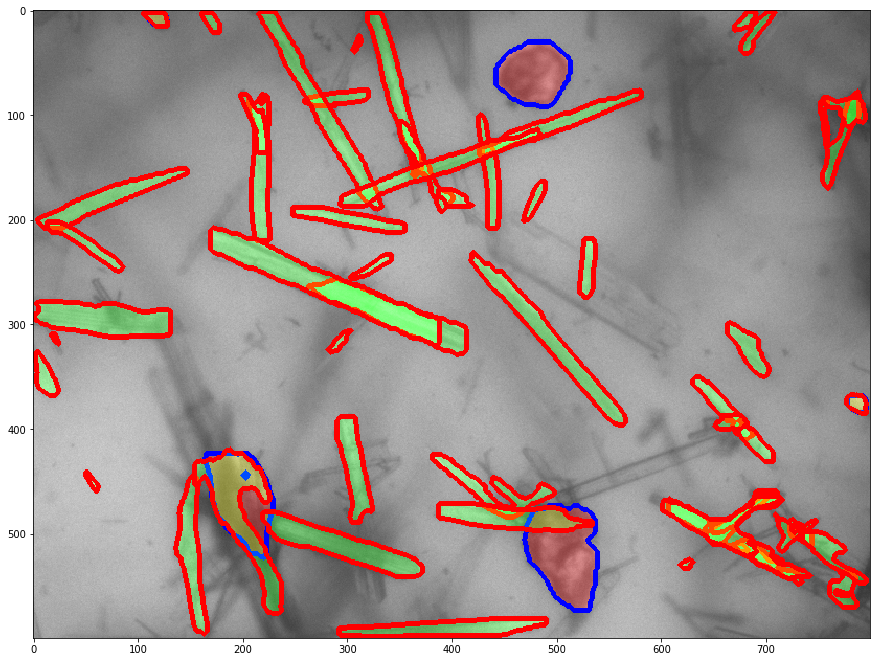

In [188]:
#obj = pickle.load(pickle_file)
file_name = obj['f']
annotation = json.loads(obj['m'])['cls_segms']
decoded_masks_alpha = mask.decode(annotation[1])
decoded_masks_beta = mask.decode(annotation[2])


current_image = os.path.join(image_path, file_name)
I = io.imread(current_image)
I = color.gray2rgb(I)
alpha = 0.7

for i in range(decoded_masks_alpha.shape[-1]):
    colored_mask = color.grey2rgb(decoded_masks_alpha[..., i]) * [255,0,0]
    I = cv2.addWeighted(I, 1, colored_mask.astype(np.uint8), 1-alpha, 0)
    _, contours, h = cv2.findContours(decoded_masks_alpha[..., i].copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    I = cv2.drawContours(I, contours, -1, (0,0,255), 3)

for i in range(decoded_masks_beta.shape[-1]):
    colored_mask = color.grey2rgb(decoded_masks_beta[..., i]) * [0,255,0]
    I = cv2.addWeighted(I, 1, colored_mask.astype(np.uint8), 1-alpha, 0)
    _, contours, h = cv2.findContours(decoded_masks_beta[..., i].copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    I = cv2.drawContours(I, contours, -1, (255,0,0), 3)
plt.imshow(I)

In [189]:
#plt.imsave(file_name, I)

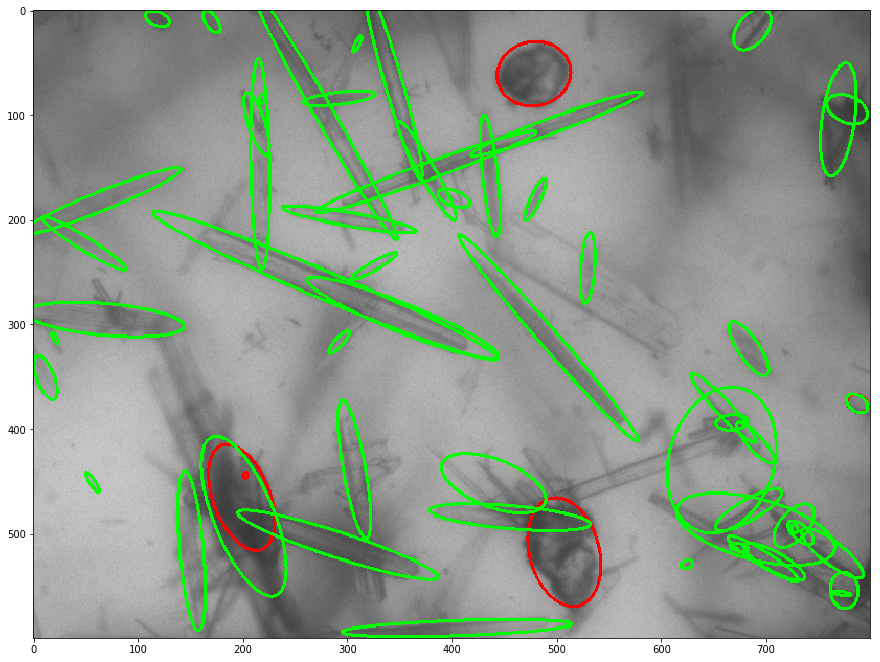

In [190]:
# create ellipse mask
Ie = io.imread(current_image)
Ie = color.gray2rgb(Ie)
alpha = 0.8

for i in range(decoded_masks_alpha.shape[-1]):
    current_mask = decoded_masks_alpha[..., i]
    _, contours, h = cv2.findContours(current_mask.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for contour in contours:
        try:
            el = cv2.fitEllipse(contour)
            Ie = cv2.ellipse(Ie, el, (255,0,0), 2)
        except:
            pass
for i in range(decoded_masks_beta.shape[-1]):
    current_mask = decoded_masks_beta[..., i]
    _, contours, h = cv2.findContours(current_mask.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for contour in contours:
        try:
            el = cv2.fitEllipse(contour)
            Ie = cv2.ellipse(Ie, el, (0,255,0), 2)
        except:
            pass
plt.imshow(Ie)

In [175]:
plt.imsave('ellipse'+file_name, Ie)

In [97]:
pickle_file.close()

In [136]:
file_name

'1526491852393.png'

In [104]:
json.loads(obj['m'])['cls_boxes']

[[],
 [[143.320587, 9.019371, 341.107025, 154.07785, 1.0],
  [0.703579, 416.881165, 98.277939, 511.438232, 0.999996],
  [218.116333, 408.162994, 482.678101, 596.378418, 0.999979],
  [595.864136, 162.946655, 688.574463, 311.347717, 0.999986],
  [735.200928, 349.489777, 798.838745, 512.537659, 0.99932],
  [694.113159, 499.202637, 778.378906, 595.720215, 0.999999]],
 []]